In [1]:
'''
s1 = 'London Paris London Nyc'
s2 = 'Paris Rome London Rome Paris is Nyc Nyc Nyc'

London- 0
Paris - 1
Nyc= 2
Rome = 3
is = 4

    0          1    2    3   4
 s1: 2        1     1   0    0
 s2: 1        2     3   2    1

'''

"\ns1 = 'London Paris London Nyc'\ns2 = 'Paris Rome London Rome Paris is Nyc Nyc Nyc'\n\nLondon- 0\nParis - 1\nNyc= 2\nRome = 3\nis = 4\n\n    0          1    2    3   4\n s1: 2        1     1   0    0\n s2: 1        2     3   2    1\n\n"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [11]:
file_name = 'movie_dataset.csv'
df = pd.read_csv(file_name)
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [5]:
df.shape

(4803, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

In [7]:
df.describe()

,index,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4803.000000,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2401.000000,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,1386.651002,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1200.500000,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,2401.000000,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,3601.500000,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,4802.000000,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


<AxesSubplot:>

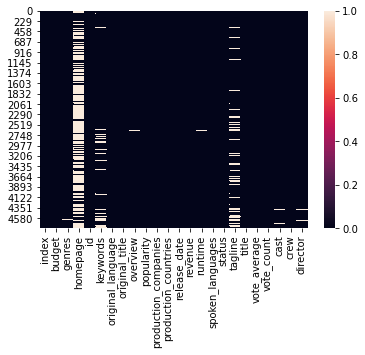

In [8]:
sns.heatmap(df.isnull())

In [9]:
df.isnull().sum()

index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64

In [12]:
features = ['keywords','cast','genres','director']

In [16]:
Title_list = df.title.tolist()
#or list(df['title'])

In [27]:
def combined_features(row):
    return row['keywords']+ ' ' + row['cast']+ ' '+ row['genres'] + ' ' + row['director']

In [23]:
for i in features:
    df[i].fillna(' ', inplace= True)

In [19]:
df.isnull().sum()

index                      0
budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                       0
crew                       0
director                   0
dtype: int64

In [29]:
df['Combined_features'] = df.apply(combined_features, axis= 1)
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director,Combined_features
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron,culture clash future space war space colony so...
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski,ocean drug abuse exotic island east india trad...
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes,spy based on novel secret agent sequel mi6 Dan...
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan,dc comics crime fighter terrorist secret ident...
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton,based on novel mars medallion space travel pri...


In [25]:
df['Combined_features'].iloc[0]

'culture clash future space war space colony society Sam Worthington Zoe Saldana Sigourney Weaver Stephen Lang Michelle Rodriguez Action Adventure Fantasy Science Fiction James Cameron'

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [33]:
cv = CountVectorizer()

In [36]:
countMatrix = cv.fit_transform(df['Combined_features'])

In [37]:
cosineSim = cosine_similarity(countMatrix)

In [38]:
cosineSim.shape

(4803, 4803)

In [39]:
cosineSim

array([[1.        , 0.10540926, 0.12038585, ..., 0.        , 0.        ,
        0.        ],
       [0.10540926, 1.        , 0.0761387 , ..., 0.03651484, 0.        ,
        0.        ],
       [0.12038585, 0.0761387 , 1.        , ..., 0.        , 0.11145564,
        0.        ],
       ...,
       [0.        , 0.03651484, 0.        , ..., 1.        , 0.        ,
        0.04264014],
       [0.        , 0.        , 0.11145564, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.04264014, 0.        ,
        1.        ]])

In [40]:
list(cosineSim[10])

[0.23094010767585035,
 0.10954451150103323,
 0.12510864843424488,
 0.11766968108291043,
 0.16000000000000003,
 0.16000000000000003,
 0.0,
 0.21908902300206642,
 0.08528028654224418,
 0.24494897427831788,
 1.0000000000000007,
 0.08000000000000002,
 0.12510864843424488,
 0.12000000000000002,
 0.45355736761107274,
 0.07844645405527362,
 0.1796053020267749,
 0.17056057308448835,
 0.1460593486680443,
 0.12792042981336627,
 0.12247448713915893,
 0.08164965809277262,
 0.0917662935482247,
 0.08944271909999159,
 0.07071067811865475,
 0.08944271909999159,
 0.2267786838055363,
 0.16329931618554525,
 0.16329931618554525,
 0.08528028654224418,
 0.19611613513818404,
 0.16000000000000003,
 0.11338934190276817,
 0.15118578920369088,
 0.0,
 0.17457431218879393,
 0.20412414523193156,
 0.1341640786499874,
 0.15689290811054724,
 0.15689290811054724,
 0.11141720290623112,
 0.27456258919345766,
 0.0,
 0.24000000000000005,
 0.08728715609439697,
 0.15689290811054724,
 0.29711254108328294,
 0.22360679774997896

In [41]:
SimilarMovies = list(enumerate(cosineSim[546]))

In [60]:
SimilarMovies

[(0, 0.041030496993110906),
 (1, 0.03892494720807614),
 (2, 0.044455422447438706),
 (3, 0.04181210050035454),
 (4, 0.04264014327112209),
 (5, 0.04264014327112209),
 (6, 0.09782319760890368),
 (7, 0.03892494720807614),
 (8, 0.13636363636363635),
 (9, 0.04351941398892446),
 (10, 0.04264014327112209),
 (11, 0.04264014327112209),
 (12, 0.044455422447438706),
 (13, 0.04264014327112209),
 (14, 0.08058229640253801),
 (15, 0.08362420100070908),
 (16, 0.03829197905337418),
 (17, 0.04545454545454545),
 (18, 0.07784989441615228),
 (19, 0.04545454545454545),
 (20, 0.04351941398892446),
 (21, 0.04351941398892446),
 (22, 0.04891159880445184),
 (23, 0.04767312946227961),
 (24, 0.03768891807222045),
 (25, 0.0),
 (26, 0.04029114820126901),
 (27, 0.04351941398892446),
 (28, 0.04351941398892446),
 (29, 0.04545454545454545),
 (30, 0.04181210050035454),
 (31, 0.04264014327112209),
 (32, 0.08058229640253801),
 (33, 0.04029114820126901),
 (34, 0.1818181818181818),
 (35, 0.09304842103984708),
 (36, 0.08703882

In [45]:
sortedMovies = sorted(SimilarMovies, key= lambda x:x[1], reverse = True)[1:]

In [46]:
sortedMovies

[(2899, 0.30151134457776363),
 (131, 0.28603877677367767),
 (42, 0.2727272727272727),
 (848, 0.2727272727272727),
 (359, 0.26673253468463226),
 (221, 0.2667325346846322),
 (2351, 0.2559453484444957),
 (2527, 0.25584085962673253),
 (2823, 0.251259453814803),
 (2601, 0.24618298195866548),
 (130, 0.24618298195866545),
 (1777, 0.2445579940222592),
 (1086, 0.24174688920761403),
 (40, 0.2375422747394687),
 (3710, 0.23262105259961768),
 (254, 0.22975187432024505),
 (324, 0.22727272727272724),
 (698, 0.22727272727272724),
 (896, 0.22727272727272724),
 (1124, 0.22727272727272724),
 (4286, 0.22727272727272724),
 (144, 0.22227711223719354),
 (569, 0.22227711223719354),
 (966, 0.22019275302527208),
 (1983, 0.22019275302527208),
 (2738, 0.22019275302527208),
 (503, 0.2162249910469341),
 (506, 0.21320071635561044),
 (3670, 0.21320071635561041),
 (3125, 0.21029989116983447),
 (136, 0.20906050250177272),
 (578, 0.20906050250177272),
 (935, 0.20906050250177272),
 (77, 0.2090605025017727),
 (173, 0.2068

In [47]:
df.iloc[546]

index                                                                 546
budget                                                           74000000
genres                                  Family Animation Adventure Comedy
homepage                                     http://www.minionsmovie.com/
id                                                                 211672
keywords                assistant aftercreditsstinger duringcreditssti...
original_language                                                      en
original_title                                                    Minions
overview                Minions Stuart, Kevin and Bob are recruited by...
popularity                                                        875.581
production_companies    [{"name": "Universal Pictures", "id": 33}, {"n...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2015-06-17
revenue                               

In [52]:
def getTitle(index):
    return df[df['index']==index]['title'].values[0]

In [56]:
def getIndex(title):
    return df[df['title']== title]['index'].values[0]

In [57]:
getTitle(546)

'Minions'

In [58]:
getIndex('Minions')

546

In [59]:
getIndex('Batman')

1359

In [63]:
userMovieLikes = input('Please enter a movie: ')
userIndex = getIndex(userMovieLikes)

similarMovies = list(enumerate(cosineSim[userIndex]))
sortedMovies = sorted(similarMovies, key = lambda x: x[1], reverse = True)[1:]

count = 1

for movie in sortedMovies:
    index = movie[0]
    print(getTitle(index))
    
    if count==10:
        break
    
    
    count +=1
    


Please enter a movie: Minions
Legend of a Rabbit
G-Force
Toy Story 3
The Pirates! In an Adventure with Scientists!
Alvin and the Chipmunks: The Road Chip
Stuart Little 2
Love the Coopers
National Lampoon's Vacation
Harold & Kumar Escape from Guantanamo Bay
Barney's Great Adventure
